# <center>Multiclass Classification using Linear Regression</center>

<img src="img/datasets.jpg" width="80%"/>

In [1]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## How Linear Regression works in background

### Petal.Length ~ Sepal.Length + Petal.Width

In [3]:
lm(Petal.Length ~ Sepal.Length + Petal.Width, data=iris)


Call:
lm(formula = Petal.Length ~ Sepal.Length + Petal.Width, data = iris)

Coefficients:
 (Intercept)  Sepal.Length   Petal.Width  
     -1.5071        0.5423        1.7481  


$$ \hat{Petal.Length} = \beta_{intercept}+(\beta_{Sepal\_Length}*Sepal.Length)+(\beta_{Petal.Width}*Petal.Width) $$

### How were the betas estimated

### [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) / [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

$X$ -- Explanatory Variables (Sepal.Length, Petal.Width)

$Y$ -- Dependent Variables (Petal.Length)

In [4]:
# "Sepal.Length" and "Petal.Width" columns are used to predict "Petal.Length"
X = iris[ , c("Sepal.Length", "Petal.Width") ]

# 1s is used as column for the intercept coefficient
X[ , 'intercept'] = 1

In [5]:
head(X)

,Sepal.Length,Petal.Width,intercept
,<dbl>,<dbl>,<dbl>
1,5.1,0.2,1
2,4.9,0.2,1
3,4.7,0.2,1
4,4.6,0.2,1
5,5.0,0.2,1
6,5.4,0.4,1


In [6]:
Y = iris[ , "Petal.Length" ]

In [7]:
X = as.matrix(X)
Y = as.matrix(Y)

## Estimating the Coefficients

## $ \hat{\beta} = (X^\top X) ^{-1} X^\top Y$ 

In [8]:
beta = ( solve( t(X) %*% X ) %*% t(X) ) %*% Y
beta

Sepal.Length,0.5422556
Petal.Width,1.7481029
intercept,-1.5071384


In [9]:
lm(Petal.Length ~ Sepal.Length + Petal.Width, data=iris)


Call:
lm(formula = Petal.Length ~ Sepal.Length + Petal.Width, data = iris)

Coefficients:
 (Intercept)  Sepal.Length   Petal.Width  
     -1.5071        0.5423        1.7481  


$$ \hat{Petal.Length} = \beta_{intercept}+(\beta_{Sepal\_Length}*Sepal.Length)+(\beta_{Petal.Width}*Petal.Width) $$

In [10]:
yhat = -1.5071 + 0.5423*X[,'Sepal.Length'] + 1.7481*X[,'Petal.Width']
head(yhat)

[1] 1.60825 1.49979 1.39133 1.33710 1.55402 2.12056

## $$ \hat{Y} = A \hat{\beta} $$
<center>A -- new data point(s) to be predicted</center>

In [11]:
yhat = X %*% beta
head(yhat)

1.607986
1.499535
1.391084
1.336858
1.553760
2.120283



# Multiclass classification of iris dataset using Linear Regression (OLS)

### Species ~ Petal.Length + Petal.Width

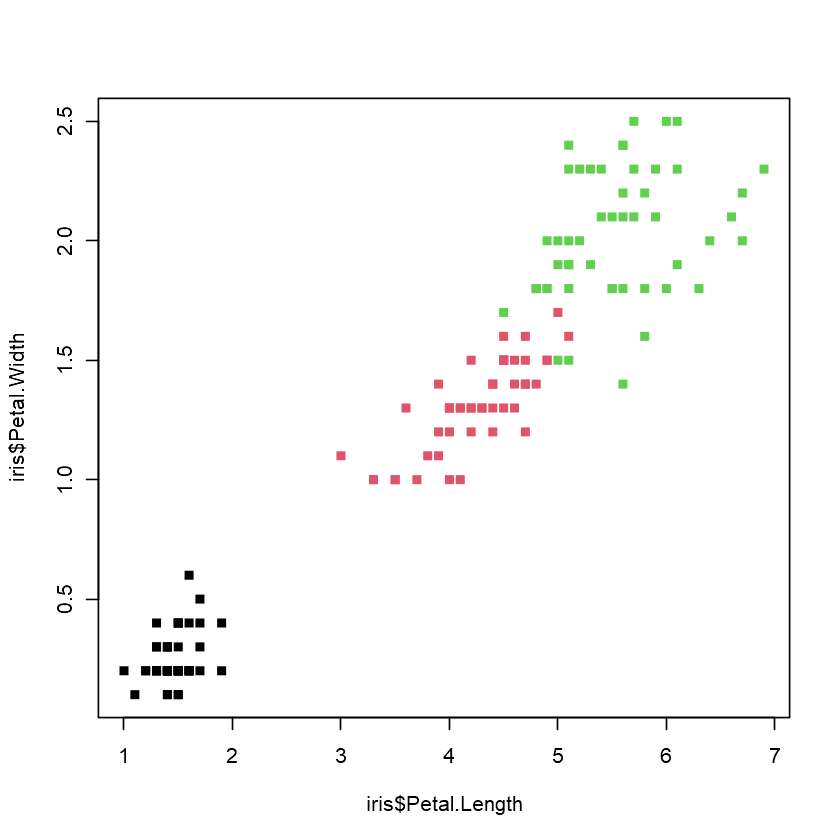

In [12]:
plot(iris$Petal.Length, iris$Petal.Width, col=iris$Species, pch=15)

### Species ~ Petal.Length + Petal.Width

$X$ -- Explanatory Variables (Petal.Length, Petal.Width)

$Y$ -- Dependent Variables (Species)

In [13]:
X = iris[ , c("Petal.Length", "Petal.Width") ]
X[,"intercept"] = 1
X = as.matrix(X)
head(X)

Petal.Length,Petal.Width,intercept
1.4,0.2,1
1.4,0.2,1
1.3,0.2,1
1.5,0.2,1
1.4,0.2,1
1.7,0.4,1


$X$ -- Explanatory Variables (Petal.Length, Petal.Width)

$Y$ -- Dependent Variables (Species)

#### [Dummy Variable](https://en.wikipedia.org/wiki/Dummy_variable_(statistics))

## <center>Binary Class Matrix</center>
<img src="img/categorical.png" width="50%"/>

In [14]:
Y = as.matrix(data.frame((iris$Species=="setosa")*1, (iris$Species=="versicolor")*1, (iris$Species=="virginica")*1 ))
Y

X.iris.Species.....setosa.....1,X.iris.Species.....versicolor.....1,X.iris.Species.....virginica.....1
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0
1,0,0


## Estimating the Coefficients

## $ \hat{\beta} = (X^\top X) ^{-1} X^\top Y$ 

In [15]:
beta = ( solve( t(X) %*% X ) %*% t(X) ) %*% Y
beta

,X.iris.Species.....setosa.....1,X.iris.Species.....versicolor.....1,X.iris.Species.....virginica.....1
Petal.Length,-0.25132905,0.3243352,-0.07300611
Petal.Width,0.00983426,-0.6500895,0.64025527
intercept,1.26603335,-0.1058442,-0.16018919


## $$ \hat{Y} = A \hat{\beta} $$
<center>A -- new data point(s) to be predicted</center>

In [16]:
yhat = X %*% beta
yhat

X.iris.Species.....setosa.....1,X.iris.Species.....versicolor.....1,X.iris.Species.....virginica.....1
0.9161395,0.21820716,-0.134346695
0.9161395,0.21820716,-0.134346695
0.9412724,0.18577364,-0.127046084
0.8910066,0.25064068,-0.141647306
0.9161395,0.21820716,-0.134346695
0.8427077,0.18548980,-0.028197473
0.9171230,0.15319821,-0.070321167
0.8910066,0.25064068,-0.141647306
0.9161395,0.21820716,-0.134346695
0.8900232,0.31564963,-0.205672833


In [17]:
max1 = apply(yhat, 1, which.max)
max1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 3 3 2 3 1 2 3 1 3 2 2 3 3 3 2 3 2 3 3 2 2
 [75] 2 3 2 3 3 1 2 2 2 2 3 3 3 2 2 3 2 2 2 1 2 2 2 2 1 2 3 3 3 3 3 3 3 2 2 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 2 3 3 2 3 3 3 2 2 2 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

In [18]:
species1 = c('setosa', 'versicolor', 'virginica')
species1[max1]

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
  [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [16] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [21] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [26] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [31] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [36] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [41] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [46] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [51] "versicolor" "virginica"  "versicolor" "virginica"  "virginica" 
 [56] "versicolor" "virginica"  "setosa"     "versicolor" "virginica" 
 [61] "setosa"     "virginica"  "versicolor" "versicolor" "virginica" 
 [66] "virginica"  "virginica"  "versicolor" "virginica"  "versicolor"
 [71] "virginica"  "virginica"  "versicolor" "versicolor" "versicolor"
 [76] "virginica"  "versicolor" "virginica"  "virginica"  "setosa"    
 [81] "versicolor" "versicolor" "versicolor" "versicolor" "virginica" 
 [86] "virginica"  "virginica"  "versicolor" "versicolor" "virginica" 
 [91] "versicolor" "versicolor" "versicolor" "setosa"     "versicolor"
 [96] "versicolor" "versicolor" "versicolor" "setosa"     "versicolor"
[101] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[106] "virginica"  "virginica"  "versicolor" "versicolor" "virginica" 
[111] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[116] "virginica"  "virginica"  "virginica"  "virginica"  "versicolor"
[121] "virginica"  "virginica"  "versicolor" "virginica"  "virginica" 
[126] "versicolor" "virginica"  "virginica"  "virginica"  "versicolor"
[131] "versicolor" "versicolor" "virginica"  "versicolor" "versicolor"
[136] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[141] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[146] "virginica"  "virginica"  "virginica"  "virginica"  "virginica"

In [19]:
table(species1[max1] == iris$Species)


FALSE  TRUE 
   34   116 

#### [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [20]:
table(species1[max1],iris$Species)

            
             setosa versicolor virginica
  setosa         50          5         0
  versicolor      0         26        10
  virginica       0         19        40

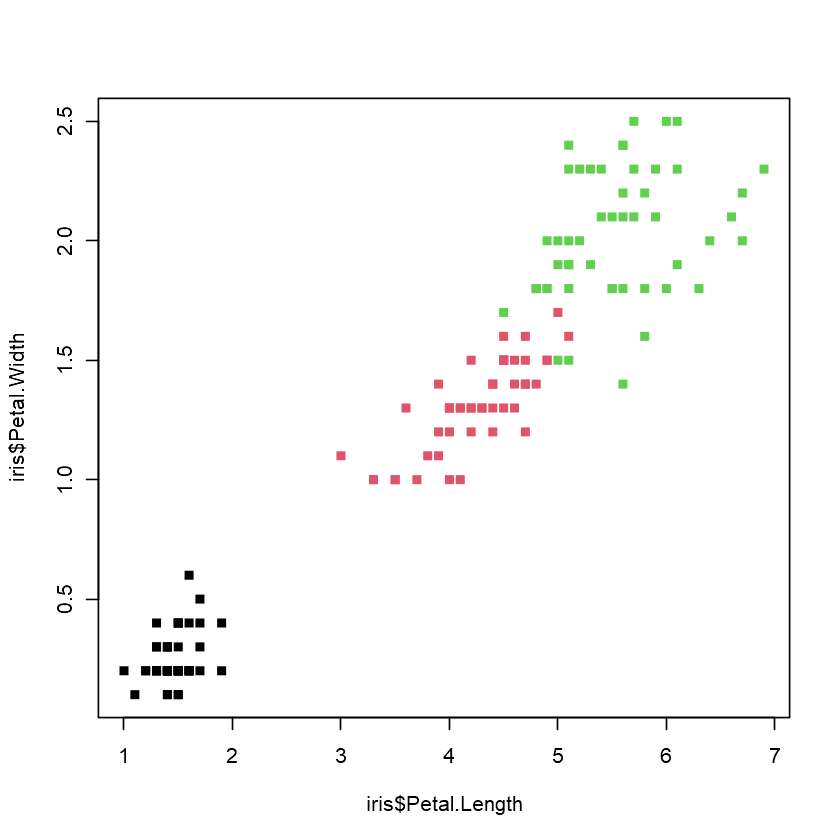

In [21]:
plot(iris$Petal.Length, iris$Petal.Width, col=iris$Species, pch=15)

In [22]:
116 * 100 / 150

[1] 77.33333

## How did it work in the backend?

### Species ~ Petal.Length

In [23]:
#repeat the same procedure

X = iris[ , c("Petal.Length") , drop=FALSE ]
X[ , 'intercept'] = 1
X = as.matrix(X)

# Y matrix is same and so not calcualted again

beta = ( solve( t(X) %*% X ) %*% t(X) ) %*% Y
beta

,X.iris.Species.....setosa.....1,X.iris.Species.....versicolor.....1,X.iris.Species.....virginica.....1
Petal.Length,-0.2472404,0.05405692,0.1931835
intercept,1.2624628,0.13018744,-0.3926502


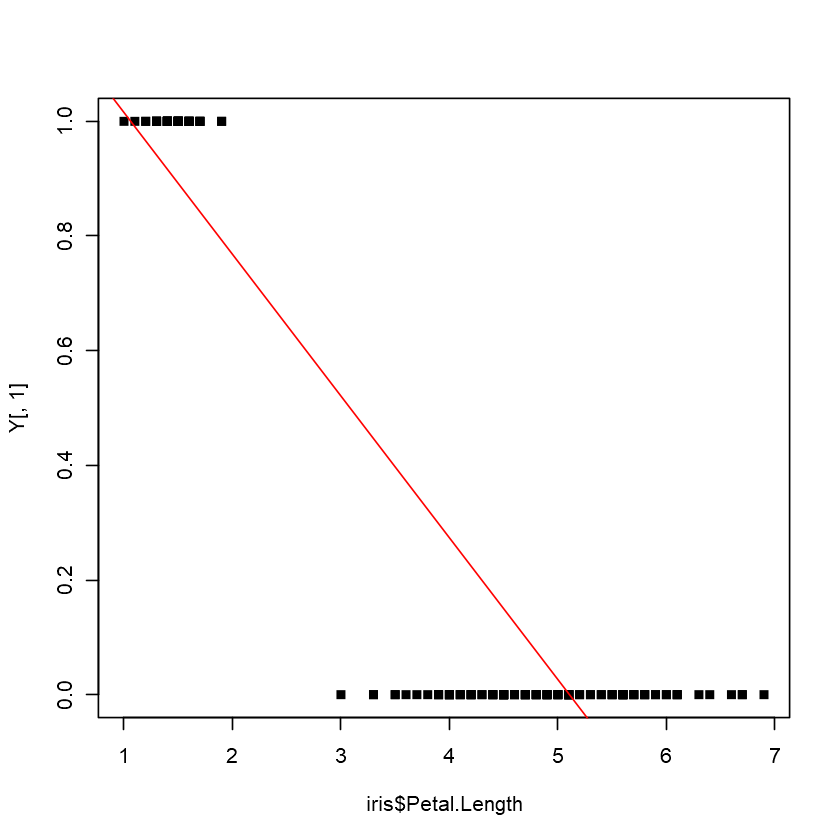

In [24]:
plot(iris$Petal.Length, Y[,1], pch=15)
abline(a=1.2624628, b=-0.2472404, col="red")

In [25]:
beta

,X.iris.Species.....setosa.....1,X.iris.Species.....versicolor.....1,X.iris.Species.....virginica.....1
Petal.Length,-0.2472404,0.05405692,0.1931835
intercept,1.2624628,0.13018744,-0.3926502


#### What will the predicted "Species" be for "Petal.Length"=8

$$ P(setosa) = \beta_{intercept_{setosa}}+(\beta_{Petal\_Length_{setosa}}*Petal.Length) $$
$$ P(versicolor) = \beta_{intercept_{versicolor}}+(\beta_{Petal\_Length_{versicolor}}*Petal.Length) $$
$$ P(virginica) = \beta_{intercept_{virginica}}+(\beta_{Petal\_Length_{virginica}}*Petal.Length) $$

In [26]:
1.26246280 + (-0.24724040 * 8) # setosa
0.13018744 + ( 0.05405692 * 8) # versicolor
-0.3926502 + ( 0.19318350 * 8) # virginica

[1] -0.7154604

[1] 0.5626428

[1] 1.152818

## $$ \hat{Y} = A \hat{\beta} $$
<center>A -- new data point(s) to be predicted</center>

In [27]:
X = matrix(c(8,1),ncol=2)
X
X %*% beta

8,1


X.iris.Species.....setosa.....1,X.iris.Species.....versicolor.....1,X.iris.Species.....virginica.....1
-0.7154605,0.5626428,1.152818


- So Linear Regression prediction values vary from -Inf to Inf.
- Unlike Linear Regression, in Logistic Regression the prediction values are bounded between 0 and 1.

# MNIST
MNIST contain 28 X 28 pixels hand-written digits like the below.<br>

<img src="img/mnist.png" width="500" align="center"/>

In [29]:
library('keras') # package to import data, and reshape it
library('MASS') # package to calculate pseudo inverse

Warning message:
"package 'keras' was built under R version 4.1.3"
Warning message:
"package 'MASS' was built under R version 4.1.3"


In [30]:
mnist <- dataset_mnist() # loading data -- function present in keras package

Loaded Tensorflow version 2.6.0



mnist variables is a list which contains 2 data frames - a training set and a test set.<br>
"$x$" and "$y$" are explanatory and response variables in each set.

In [31]:
str(mnist)

List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


In [32]:
mnist$train$x[1,,]

0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,0


### Plotting the 1st digit of MNIST

Warning message:
"package 'plot.matrix' was built under R version 4.1.3"


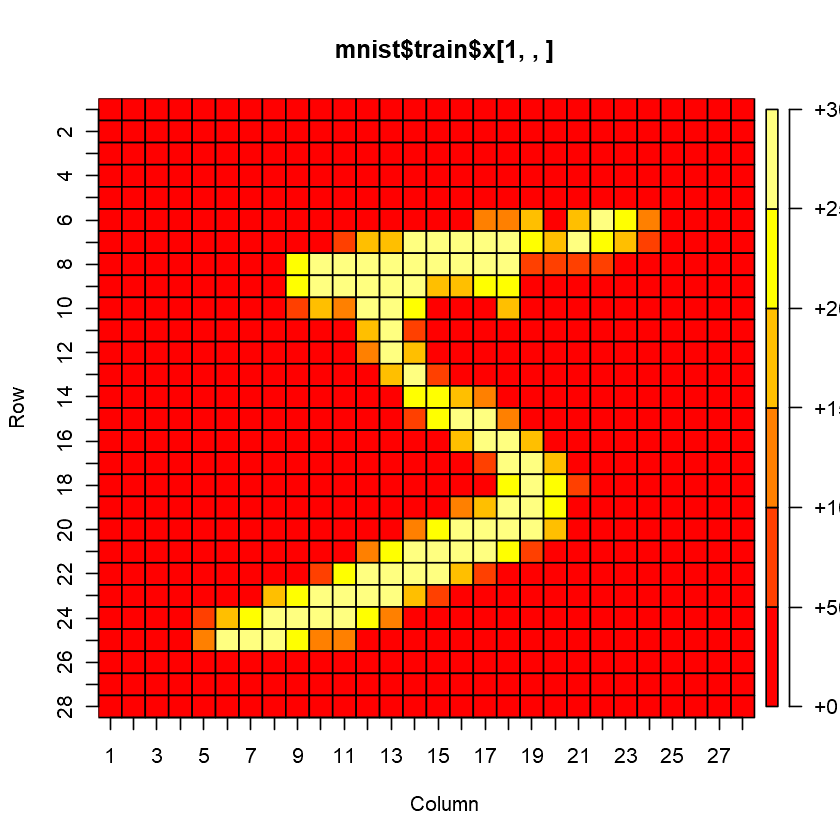

In [33]:
library("plot.matrix")
plot(mnist$train$x[1,,])

MNIST contain 28 X 28 pixels hand-written digits like the below.<br>
$28\times 28 = 784$ features 

<img src="img/flatten.png" width="90%"/>

In [34]:
# flattening 28 X 28 pixels
X <- array_reshape( mnist$train$x, c(dim(mnist$train$x)[1], 784) )
dim(mnist$train$x)
dim(X)

[1] 60000    28    28

[1] 60000   784

In [35]:
# adding 1s as a feature for the intercept term
X = cbind(matrix(rep(1, nrow(X))), X)
dim(X)
head(X)

[1] 60000   785

1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# The response variable is the digit number varying from 0 to 9.
head(mnist$train$y)

[1] 5 0 4 1 9 2

In [37]:
table(mnist$train$y)


   0    1    2    3    4    5    6    7    8    9 
5923 6742 5958 6131 5842 5421 5918 6265 5851 5949 

## <center>Binary Class Matrix</center>
<img src="img/categorical_mnist.png" width="90%"/>

In [38]:
# converting the response column to binary class matrix
Y = to_categorical(mnist$train$y) 
dim(Y)
head(Y)

[1] 60000    10

0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0


## Estimating the Coefficients

### $ \hat{\beta} = (X^\top X) ^{-1} X^\top Y$ 
but a square matrix is not invertible if its determinant is zero

In [39]:
det( t(X) %*% X ) 

[1] 0

### [$ X^\dagger = (X^\top X) ^{-1} X^\top $](https://en.wikipedia.org/wiki/Ordinary_least_squares) 

#### where $X^\dagger$ is the pseudoinverse.

### $ \hat{\beta} = X^\dagger Y $

In [40]:
# This may take about two minutes for the whole 60,000 observation dataset 
pseudoInv = ginv(X)

In [41]:
beta = pseudoInv %*% Y
dim(beta)

[1] 785  10

## $$ \hat{Y} = A \hat{\beta} $$
<center>A -- new data point(s) to be predicted</center>

In [42]:
pred = X %*% beta
dim(pred)
head(pred)

[1] 60000    10

0.08644075,0.004766444,-0.09447354,0.431714569,-0.20754587,0.51117534,0.18425632,0.31506050,-0.12973360,-0.10166092
0.88688181,0.061572969,-0.09623659,0.007236001,-0.08835300,0.02534450,0.03593482,0.11064445,-0.03883734,0.09581239
-0.07409443,0.093421749,0.16155879,0.170990580,0.68516906,-0.05337708,-0.01430479,0.20999633,-0.02298965,-0.15637055
-0.05834299,0.686115111,0.08892267,0.042920041,0.08882102,0.03322134,0.01295888,0.02851605,0.17076923,-0.09390134
0.08575935,0.101719175,-0.02161877,-0.162229749,0.16495547,-0.08989457,-0.02415261,0.17355926,0.09737054,0.67453190
0.09661197,0.027554654,0.61565856,-0.123091399,-0.01691397,0.12897129,-0.10264751,0.06560043,0.00756575,0.30069023


In [43]:
# "pred" is a number proportional to the possibility of an instance belonging to a digit. 
# we classify the instance into that class which is maximum 
table(mnist$train$y, apply(pred, 1, which.max)-1)   #  confusion matrix
mean(mnist$train$y == apply(pred, 1, which.max)-1)  #  train accuracy

   
       0    1    2    3    4    5    6    7    8    9
  0 5682    7   18   14   24   43   64    4   61    6
  1    2 6548   40   15   19   31   14   12   55    6
  2   99  264 4792  149  108   11  234   91  192   18
  3   42  167  176 5158   32  125   56  115  135  125
  4   10   99   42    6 5212   50   39   23   59  302
  5  164   95   28  432  105 3991  192   36  235  143
  6  108   74   61    1   70   90 5476    0   35    3
  7   55  189   37   47  170    9    2 5426   10  320
  8   75  493   63  226  105  221   56   20 4412  180
  9   68   60   20  117  371   12    4  492   38 4767

[1] 0.8577333

### Test accuracy

In [44]:
str(mnist)

List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 5 0 4 1 9 2 1 3 1 4 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 7 2 1 0 4 1 4 9 5 9 ...


## $$ \hat{Y} = A \hat{\beta} $$
<center>A -- new data point(s) to be predicted</center>

In [45]:
# redoing the same steps to calculate test error
test1 <- array_reshape( mnist$test$x, c(dim(mnist$test$x)[1], 784) ) # reshaping
test1 = cbind(matrix(rep(1, nrow(test1))), test1) # adding intercept
pred = test1 %*% beta # predicting

table(mnist$test$y, apply(pred, 1, which.max)-1)
mean(mnist$test$y == apply(pred, 1, which.max)-1)

   
       0    1    2    3    4    5    6    7    8    9
  0  944    0    1    2    2    7   14    2    7    1
  1    0 1107    2    2    3    1    5    1   14    0
  2   18   54  813   26   15    0   42   22   37    5
  3    4   17   23  880    5   17    9   21   22   12
  4    0   22    6    1  881    5   10    2   11   44
  5   23   18    3   72   24  659   23   14   39   17
  6   18   10    9    0   22   17  875    0    7    0
  7    5   40   16    6   26    0    1  884    0   50
  8   14   46   11   30   27   40   15   12  759   20
  9   15   11    2   17   80    1    1   77    4  801

[1] 0.8603

## This file available in GitHub -- https://github.com/ajayhemanth/Its-all-about-Data